In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data2018=pd.read_csv("england-premier-league-teams-2017-to-2018-stats.csv")
data2019=pd.read_csv("england-premier-league-teams-2018-to-2019-stats.csv")
data2020=pd.read_csv("england-premier-league-teams-2019-to-2020-stats.csv")
data2021=pd.read_csv("england-premier-league-teams-2020-to-2021-stats.csv")
data2022=pd.read_csv("england-premier-league-teams-2021-to-2022-stats.csv")

In [3]:
data=pd.concat([data2018,data2019,data2020,data2021,data2022])
data["points"]=3*data["wins"]+1*data["draws"]
print(data.columns)

Index(['team_name', 'common_name', 'season', 'country', 'matches_played',
       'matches_played_home', 'matches_played_away', 'suspended_matches',
       'wins', 'wins_home',
       ...
       'goals_conceded_min_71_to_80', 'goals_conceded_min_81_to_90',
       'draw_percentage_overall', 'draw_percentage_home',
       'draw_percentage_away', 'loss_percentage_ovearll',
       'loss_percentage_home', 'loss_percentage_away',
       'over145_corners_percentage', 'points'],
      dtype='object', length=294)


In [4]:
top_4 = data[data["league_position"]<=4]
non_top_4 = data[data["league_position"]>4]
top_4

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90,draw_percentage_overall,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage,points
1,Tottenham Hotspur FC,Tottenham Hotspur,2017/2018,England,38,19,19,0,23,13,...,4,8,21,21,21,18,11,26,13,77
2,Manchester City FC,Manchester City,2017/2018,England,38,19,19,0,32,16,...,1,4,11,11,11,5,5,5,8,100
11,Manchester United FC,Manchester United,2017/2018,England,38,19,19,0,25,15,...,3,2,16,11,21,18,11,26,8,81
12,Liverpool FC,Liverpool,2017/2018,England,38,19,19,0,21,12,...,4,8,32,37,26,13,0,26,5,75
1,Tottenham Hotspur FC,Tottenham Hotspur,2018/2019,England,38,19,19,0,23,12,...,8,10,5,11,0,34,26,42,11,71
2,Manchester City FC,Manchester City,2018/2019,England,38,19,19,0,32,18,...,2,3,5,0,11,11,5,16,5,98
10,Liverpool FC,Liverpool,2018/2019,England,38,19,19,0,30,17,...,3,4,18,11,26,3,0,5,5,97
11,Chelsea FC,Chelsea,2018/2019,England,38,19,19,0,21,12,...,4,3,24,32,16,21,5,37,3,72
2,Manchester City FC,Manchester City,2019/2020,England,38,19,19,0,26,15,...,4,9,8,11,5,24,11,37,24,81
9,Manchester United FC,Manchester United,2019/2020,England,38,19,19,0,18,10,...,1,8,32,37,26,21,11,32,18,66


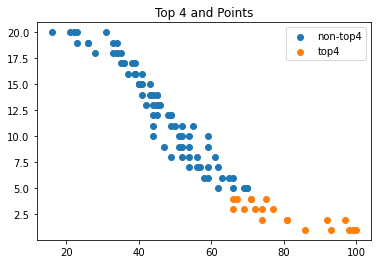

In [5]:
plt.scatter(non_top_4['points'],non_top_4["league_position"], label=f'non-top4')
plt.scatter(top_4['points'], top_4["league_position"], label=f'top4')
plt.rcParams.update({'figure.figsize':(6.4,4.8), 'figure.dpi':100})
plt.title('Top 4 and Points')
plt.legend()
plt.show()

The problem of interest can be formulated as a classification problems where it is predicted that a team will finish top 4 (positives) if they reach at least a certain threshold of points. It is clear from the graph that a good threshold should be a little less than 70 points, we can build a contingency table that serves as a confusion matrix to evaluate each value.

In [6]:
data['Top4']= ['not_Top4' if i>4 else 'Top4' for i in data['league_position']]
data['67pts']= ['O67' if i>=67 else 'U67' for i in data['points']]

False positives occur when the team scored over 67 points ("O67") but did not qualify for the Champions League ("Not Top4"), while false negatives are the cases where the team scored under 67 points ("U67") but still ranked top 4. 

In [7]:
data_crosstab = pd.crosstab(data['Top4'],data['67pts'],rownames=['Actual'], colnames=['Predicted'])
data_crosstab

Predicted,O67,U67
Actual,,
Top4,18,2
not_Top4,3,77


The Thresholds of 66 and 67 points both return an accuracy of 95%, but the threshold of 67 was chosen because it had more balance between false negatives and false positives: the confusion matrix indicates a false positive rate of 3.75% and a true positive rate of 90%. 

In [26]:
data_def=pd.read_csv("avgDefStats.csv")
data_def

,Name,Win rate,Loss rate,Team,Games Played,Average Tackles,Average Errors leading to a goal,Average Blocked shots,Average Interceptions,Average Clearances,Average Recoveries,Average Duels won,Average Duels lost,Average Goals,Average Passes,Average Accurate long balls,Average Yellow cards,Average Red cards,Average Fouls
0,Lloyd Kelly,0.333333,0.541667,Bournemouth,24,1.125000,0.041667,0.125000,1.083333,3.375000,4.708333,3.083333,2.583333,0.000000,37.500000,2.250000,0.208333,0.000000,0.708333
1,Chris Mepham,0.229167,0.562500,Bournemouth,48,1.312500,0.041667,0.041667,1.208333,5.187500,3.583333,4.020833,2.708333,0.020833,36.416667,1.562500,0.187500,0.000000,0.687500
2,Adam Smith,0.310345,0.459770,Bournemouth,174,1.959770,0.005747,0.120690,1.178161,1.948276,4.091954,5.275862,4.413793,0.028736,33.390805,1.195402,0.218391,0.005747,0.988506
3,Jack Stacey,0.214286,0.571429,Bournemouth,28,0.928571,0.000000,0.000000,0.821429,2.357143,3.678571,3.107143,2.857143,0.000000,24.785714,1.071429,0.142857,0.000000,0.500000
4,Jordan Zemura,0.210526,0.473684,Bournemouth,19,2.052632,0.000000,0.052632,0.842105,1.368421,4.105263,4.105263,4.105263,0.000000,24.052632,0.578947,0.052632,0.000000,0.894737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Toti,0.500000,0.285714,Wolverhampton Wanderers,14,1.428571,0.000000,0.071429,1.142857,3.357143,3.571429,4.357143,2.642857,0.000000,37.000000,1.285714,0.285714,0.000000,0.571429
178,Nathan Collins,0.250000,0.500000,Wolverhampton Wanderers,40,1.550000,0.000000,0.100000,1.125000,3.800000,5.375000,4.475000,2.975000,0.050000,40.775000,2.675000,0.100000,0.050000,0.850000
179,Hugo Bueno,0.294118,0.470588,Wolverhampton Wanderers,17,1.647059,0.000000,0.117647,0.529412,1.470588,4.470588,3.117647,2.941176,0.000000,24.352941,0.176471,0.058824,0.000000,0.294118
180,Dexter Lembikisa,0.000000,1.000000,Wolverhampton Wanderers,1,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
data_def=data_def[data_def["Games Played"]>=(data_def["Games Played"].mean())/4]
data_def

,Name,Win rate,Loss rate,Team,Games Played,Average Tackles,Average Errors leading to a goal,Average Blocked shots,Average Interceptions,Average Clearances,Average Recoveries,Average Duels won,Average Duels lost,Average Goals,Average Passes,Average Accurate long balls,Average Yellow cards,Average Red cards,Average Fouls
0,Lloyd Kelly,0.333333,0.541667,Bournemouth,24,1.125000,0.041667,0.125000,1.083333,3.375000,4.708333,3.083333,2.583333,0.000000,37.500000,2.250000,0.208333,0.000000,0.708333
1,Chris Mepham,0.229167,0.562500,Bournemouth,48,1.312500,0.041667,0.041667,1.208333,5.187500,3.583333,4.020833,2.708333,0.020833,36.416667,1.562500,0.187500,0.000000,0.687500
2,Adam Smith,0.310345,0.459770,Bournemouth,174,1.959770,0.005747,0.120690,1.178161,1.948276,4.091954,5.275862,4.413793,0.028736,33.390805,1.195402,0.218391,0.005747,0.988506
3,Jack Stacey,0.214286,0.571429,Bournemouth,28,0.928571,0.000000,0.000000,0.821429,2.357143,3.678571,3.107143,2.857143,0.000000,24.785714,1.071429,0.142857,0.000000,0.500000
5,Ryan Fredericks,0.306667,0.466667,Bournemouth,75,1.786667,0.013333,0.080000,0.706667,2.040000,2.906667,3.666667,3.000000,0.026667,24.000000,0.680000,0.213333,0.000000,0.680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Jonny,0.349057,0.367925,Wolverhampton Wanderers,106,2.264151,0.028302,0.216981,1.405660,1.150943,4.660377,5.141509,5.122642,0.056604,33.424528,0.952830,0.132075,0.009434,0.820755
175,Nelson Semedo,0.340909,0.443182,Wolverhampton Wanderers,88,2.340909,0.011364,0.170455,0.954545,2.022727,5.340909,5.522727,4.852273,0.011364,39.113636,1.170455,0.170455,0.011364,1.113636
176,Maximilian Kilman,0.385542,0.397590,Wolverhampton Wanderers,83,1.277108,0.012048,0.072289,1.024096,3.566265,5.048193,4.060241,2.590361,0.012048,50.337349,2.433735,0.120482,0.000000,0.626506
178,Nathan Collins,0.250000,0.500000,Wolverhampton Wanderers,40,1.550000,0.000000,0.100000,1.125000,3.800000,5.375000,4.475000,2.975000,0.050000,40.775000,2.675000,0.100000,0.050000,0.850000


In [28]:
#data_players[data_players["Win rate"]>max(data_players["Win rate"])-0.2]

In [29]:
data_def["avg_points"]=38*(3*data_def["Win rate"]+(1-data_def["Win rate"]-data_def["Loss rate"]))
data_def["pred_top4"]=[1 if i>=67 else 0 for i in data_def["avg_points"]]

/var/folders/w8/jvzdr76n7_j9yh__n1w9gxr00000gn/T/ipykernel_50542/114490999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_def["avg_points"]=38*(3*data_def["Win rate"]+(1-data_def["Win rate"]-data_def["Loss rate"]))
/var/folders/w8/jvzdr76n7_j9yh__n1w9gxr00000gn/T/ipykernel_50542/114490999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_def["pred_top4"]=[1 if i>=67 else 0 for i in data_def["avg_points"]]


In [30]:
def get_correlation(df):
    corr_matrix = df.corr()
    corr_points = corr_matrix.loc["avg_points"]
    corr_top4 = corr_matrix.loc["pred_top4"]
    df_corr = pd.concat([corr_points, corr_top4], axis=1)
    df_corr.columns = ["Correlation with Points Gained", "Correlation with Predicted Top 4"]
    return df_corr
get_correlation(data_def)

/var/folders/w8/jvzdr76n7_j9yh__n1w9gxr00000gn/T/ipykernel_50542/3165724737.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Correlation with Points Gained,Correlation with Predicted Top 4
Win rate,0.988746,0.779256
Loss rate,-0.943642,-0.708499
Games Played,0.186694,0.063449
Average Tackles,-0.113456,-0.154674
Average Errors leading to a goal,0.076240,-0.001510
Average Blocked shots,0.173947,0.063678
Average Interceptions,-0.151799,-0.200942
Average Clearances,-0.156897,-0.074389
Average Recoveries,0.130002,0.024171
Average Duels won,-0.072917,-0.211041


<AxesSubplot:>

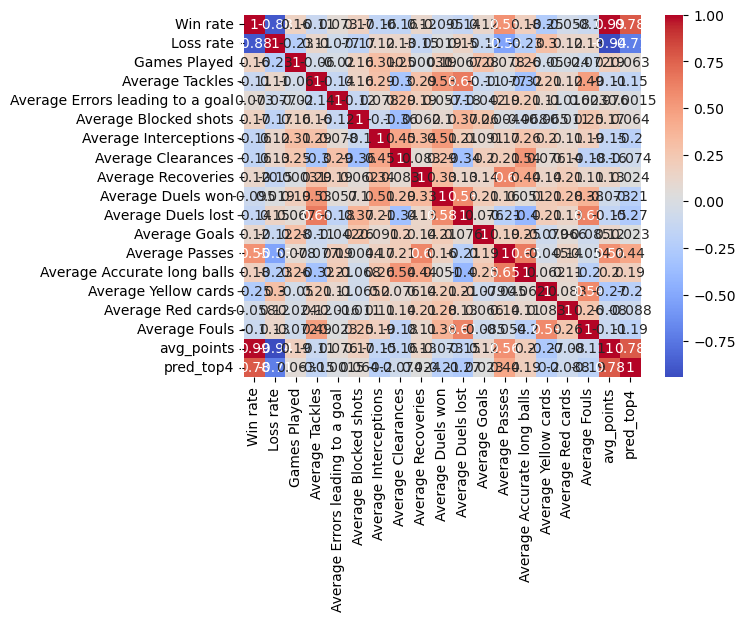

In [31]:
corr_matrix_def = data_def.corr(numeric_only=True)
sns.heatmap(corr_matrix_def, annot=True, cmap='coolwarm')

In [ ]:
#FOR DEFENCE CORRELATION IS NOT VERY RELEVANT BUT FOR ATTACKERS IT GETS BETTER, WILL GENERALIZE TOMORROW

In [ ]:
#P-VALUE ANALYSIS 